# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.0906,  0.3784,  0.202 ,  0.7092,  0.9617,  0.272 ,  0.4348,  0.2716,  0.3342,  0.9728,
        0.3974,  0.8792,  0.2868,  0.3096,  0.6293,  0.8007,  0.4434,  0.1697,  0.7358,  0.9299,
        0.827 ,  0.9351,  0.5746,  0.454 ,  0.3533,  0.7313,  0.2681,  0.7755,  0.3656,  0.1485])

In [6]:
y

array([  8.2719,   9.1352,   8.6059,  10.1275,  10.8851,   8.8159,   9.3045,   8.8148,   9.0025,
        10.9183,   9.1923,  10.6376,   8.8603,   8.9287,   9.888 ,  10.4022,   9.3301,   8.5092,
        10.2074,  10.7898,  10.4811,  10.8054,   9.7239,   9.362 ,   9.0598,  10.1939,   8.8044,
        10.3266,   9.0968,   8.4455])

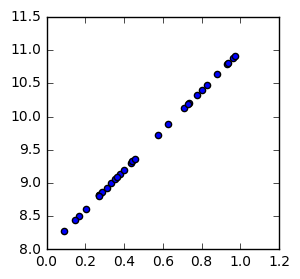

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1505

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani